Execution of dytnamic temperature
Iteration: 40
Elapsed:     0.0128s
Best distance: 39601.2774
Temperature: 960.7702107358117
Memory used: 107741184
--------------


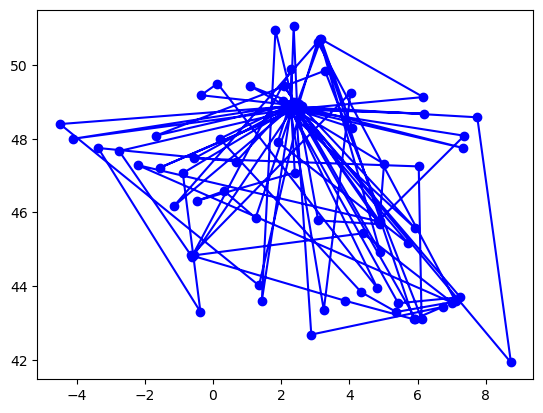

Iteration: 80
Elapsed:     0.2723s
Best distance: 39601.2774
Temperature: 923.0793978373366
Memory used: 113385472
--------------


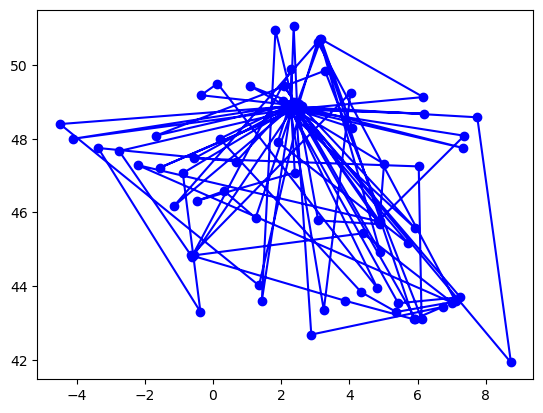

Iteration: 120
Elapsed:     0.5004s
Best distance: 39601.2774
Temperature: 886.8671875860642
Memory used: 116236288
--------------


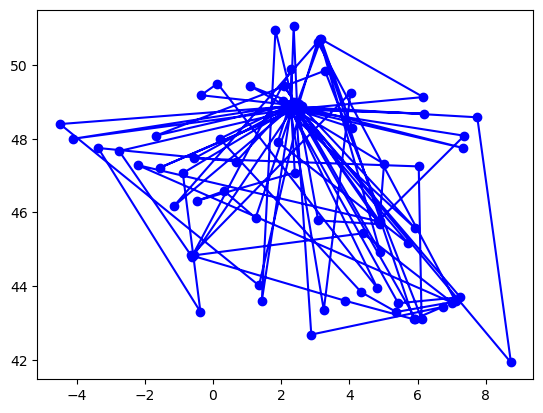

Iteration: 160
Elapsed:     0.7626s
Best distance: 39601.2774
Temperature: 852.0755747117396
Memory used: 113905664
--------------


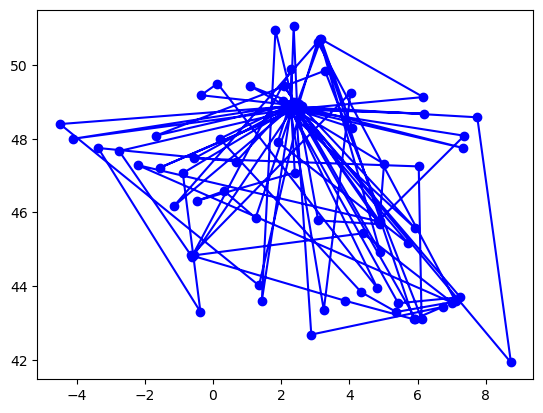

Iteration: 200
Elapsed:     0.9975s
Best distance: 39601.2774
Temperature: 818.648829478636
Memory used: 116523008
--------------


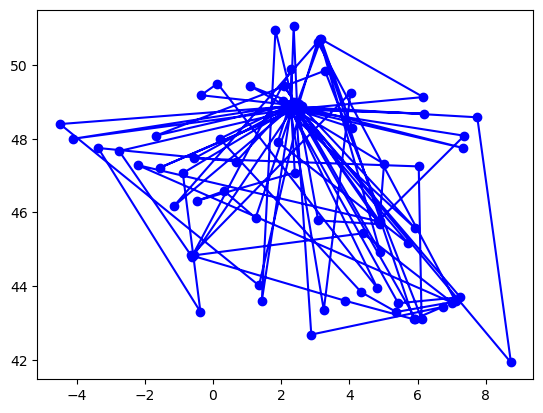


Final data:

Nb Iteration: 200
Elapsed:     1.2349s
Best distance: 39601.2774
Memory used (Mo): 112.5234375


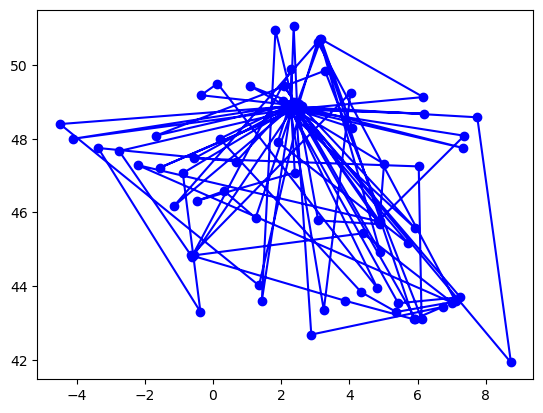


Distance camion n°  1   4038 km

Distance camion n°  2   4133 km

Distance camion n°  3   2819 km

Distance camion n°  4   2888 km

Distance camion n°  5   5540 km

Distance camion n°  6   3370 km

Distance camion n°  7   5271 km

Distance camion n°  8   2722 km

Distance camion n°  9   3720 km

Distance camion n°  10   6440 km


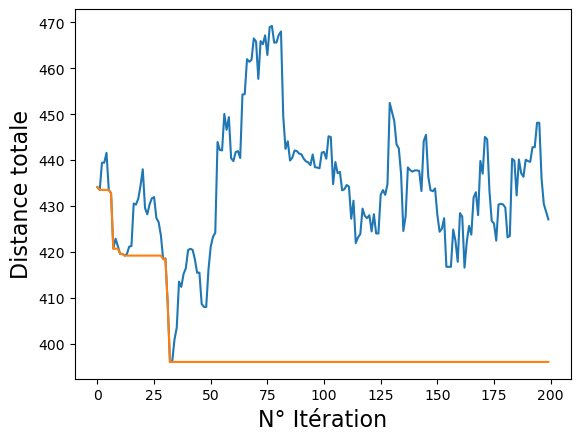

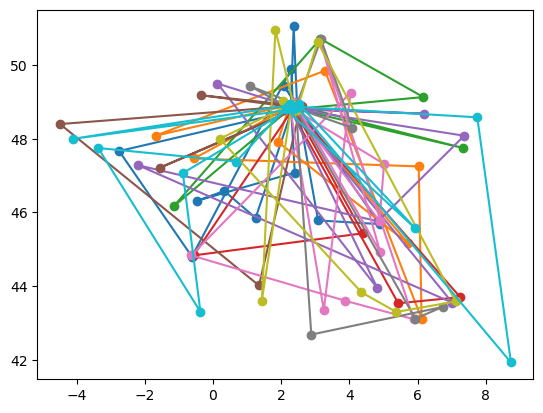

In [1]:
#!/bin/env python

import csv, psutil, os, random, time, numpy as np, math, copy, sys, argparse, matplotlib.pyplot as plt

#test
city_name = { 0 : "Paris", 1 : "Marseille", 2 : "Lyon", 3 : "Toulouse", 4 : "Nice", 5 : "Nantes", 6 : "Strasbourg", 7 : "Montpellier", 8 : "Bordeaux", 9 : "Lille", 10 : "Rennes", 11 : "Reims", 12 : "Le Havre", 13 : "Saint-etienne", 14 : "Toulon", 15 : "Grenoble", 16 : "Dijon", 17 : "Angers", 18 : "Le Mans", 19 : "Aix-en-Provence", 20 : "Brest", 21 : "Villeurbanne", 22 : "Nîmes", 23 : "Limoges", 24 : "Clermont-Ferrand", 25 : "Tours", 26 : "Amiens", 27 : "Metz", 28 : "Besancon", 29 : "Perpignan", 30 : "Orleans", 31 : "Boulogne-Billancourt", 32 : "Mulhouse", 33 : "Caen", 34 : "Rouen", 35 : "Nancy", 36 : "Saint-Denis", 37 : "Argenteuil", 38 : "Montreuil", 39 : "Roubaix", 40 : "Dunkerque", 41 : "Tourcoing", 42 : "Avignon", 43 : "Nanterre", 44 : "Creteil", 45 : "Poitiers", 46 : "Versailles", 47 : "Courbevoie", 48 : "Vitry-sur-Seine", 49 : "Pau", 50 : "Colombes", 51 : "Aulnay-sous-Bois", 52 : "Asnieres-sur-Seine", 53 : "Rueil-Malmaison", 54 : "Antibes", 55 : "La Rochelle", 56 : "Saint-Maur-des-Fosses", 57 : "Champigny-sur-Marne", 58 : "Calais", 59 : "Aubervilliers", 60 : "Cannes", 61 : "Beziers", 62 : "Bourges", 63 : "Colmar", 64 : "Saint-Nazaire", 65 : "Drancy", 66 : "Merignac", 67 : "Ajaccio", 68 : "Valence", 69 : "Quimper", 70 : "Issy-les-Moulineaux", 71 : "Noisy-le-Grand", 72 : "Levallois-Perret", 73 : "Villeneuve-d'Ascq", 74 : "Troyes", 75 : "Antony", 76 : "Neuilly-sur-Seine", 77 : "La Seyne-sur-Mer", 78 : "Sarcelles", 79 : "Clichy", 80 : "Niort", 81 : "Lorient", 82 : "Venissieux", 83 : "Pessac", 84 : "Chambery", 85 : "Saint-Quentin", 86 : "Ivry-sur-Seine", 87 : "Cergy", 88 : "Montauban", 89 : "Hyeres", 90 : "Beauvais", 91 : "Cholet", 92 : "Bondy", 93 : "Villejuif", 94 : "Vannes", 95 : "Maisons-Alfort", 96 : "Fontenay-sous-Bois", 97 : "Chelles", 98 : "Pantin", 99 : "epinay-sur-Seine", 100 : "Frejus", 101 : "Arles", 102 : "evry", 103 : "La Roche-sur-Yon", 104 : "Grasse", 105 : "Clamart", 106 : "Sartrouville", 107 : "Narbonne", 108 : "Laval", 109 : "Charleville-Mezieres", 110 : "Sevran", 111 : "evreux", 112 : "Le Blanc-Mesnil", 113 : "Belfort", 114 : "Annecy", 115 : "Brive-la-Gaillarde", 116 : "Cagnes-sur-Mer", 117 : "Albi", 118 : "Meaux", 119 : "Saint-Malo", 120 : "Vincennes", 121 : "Bobigny", 122 : "Carcassonne", 123 : "Blois", 124 : "Montrouge", 125 : "Martigues", 126 : "Chalons-en-Champagne", 127 : "Aubagne", 128 : "Chalon-sur-Saone", 129 : "Chateauroux", 130 : "Saint-Brieuc", 131 : "Saint-Ouen", 132 : "Suresnes", 133 : "Alfortville", 134 : "Meudon", 135 : "Puteaux", 136 : "Bayonne", 137 : "Tarbes", 138 : "Boulogne-sur-Mer", 139 : "Bastia", 140 : "Saint-Herblain", 141 : "Angouleme", 142 : "Castres", 143 : "Arras", 144 : "Sete", 145 : "Valenciennes", 146 : "Mantes-la-Jolie", 147 : "Istres", 148 : "Douai", 149 : "Livry-Gargan", 150 : "Gennevilliers", 151 : "Wattrelos", 152 : "Corbeil-Essonnes", 153 : "Compiegne", 154 : "Saint-Priest", 155 : "Salon-de-Provence", 156 : "Thionville", 157 : "Saint-Germain-en-Laye", 158 : "Caluire-et-Cuire", 159 : "Le Cannet", 160 : "Rosny-sous-Bois", 161 : "Talence", 162 : "Massy", 163 : "Ales", 164 : "Vaulx-en-Velin", 165 : "Bourg-en-Bresse", 166 : "Cherbourg-Octeville", 167 : "Garges-les-Gonesse", 168 : "Montlucon", 169 : "Chartres", 170 : "Bron", 171 : "Melun", 172 : "Marcq-en-Baroeul", 173 : "Noisy-le-Sec", 174 : "Gap", 175 : "Bagneux", 176 : "Gagny", 177 : "Choisy-le-Roi", 178 : "Anglet", 179 : "Reze", 180 : "Nevers", 181 : "Poissy", 182 : "Savigny-sur-Orge", 183 : "La Courneuve", 184 : "Auxerre", 185 : "Draguignan", 186 : "Vitrolles", 187 : "Lens", 188 : "Roanne", 189 : "Villepinte", 190 : "Joue-les-Tours", 191 : "echirolles", 192 : "Saint-Martin-d'Heres", 193 : "Tremblay-en-France", 194 : "Saint-Chamond", 195 : "Haguenau", 196 : "Six-Fours-les-Plages", 197 : "Conflans-Sainte-Honorine", 198 : "Pontault-Combault", 199 : "Montelimar", 200 : "Stains", 201 : "Creil", 202 : "Macon", 203 : "Villefranche-sur-Saone", 204 : "Bagnolet", 205 : "Sainte-Genevieve-des-Bois", 206 : "Saint-Raphael", 207 : "Montigny-le-Bretonneux", 208 : "Marignane", 209 : "La Ciotat", 210 : "Dieppe", 211 : "Chatellerault", 212 : "Romans-sur-Isere", 213 : "Franconville", 214 : "Neuilly-sur-Marne", 215 : "Agen", 216 : "Colomiers", 217 : "epinal", 218 : "Thonon-les-Bains", 219 : "Chatillon", 220 : "Maubeuge", 221 : "Le Perreux-sur-Marne", 222 : "Mureaux", 223 : "Cambrai", 224 : "Lievin", 225 : "Chatenay-Malabry", 226 : "Viry-Chatillon", 227 : "Dreux", 228 : "Schiltigheim", 229 : "Vandoeuvre-les-Nancy", 230 : "Nogent-sur-Marne", 231 : "Malakoff", 232 : "Houilles", 233 : "Villeneuve-Saint-Georges", 234 : "Plaisir", 235 : "Goussainville", 236 : "Athis-Mons", 237 : "Annemasse", 238 : "Palaiseau", 239 : "Saint-Laurent-du-Var", 240 : "Mont-de-Marsan", 241 : "Sotteville-les-Rouen", 242 : "Chatou", 243 : "Vienne", 244 : "Saint-Cloud", 245 : "Pontoise", 246 : "Thiais", 247 : "Rillieux-la-Pape", 248 : "L'Haÿ-les-Roses", 249 : "Orange", 250 : "Meyzieu", 251 : "Le Chesnay", 252 : "Clichy-sous-Bois", 253 : "Perigueux", 254 : "Vallauris", 255 : "Yerres", 256 : "Carpentras", 257 : "Pierrefitte-sur-Seine", 258 : "Villenave-d'Ornon", 259 : "Menton", 260 : "Draveil", 261 : "Charenton-le-Pont", 262 : "Guyancourt", 263 : "Aurillac", 264 : "Trappes", 265 : "Soissons", 266 : "Villemomble", 267 : "Saint-etienne-du-Rouvray", 268 : "Saumur", 269 : "Bezons", 270 : "Lambersart", 271 : "Bois-Colombes", 272 : "Savigny-le-Temple", 273 : "Ermont", 274 : "Cachan", 275 : "Alencon", 276 : "Bergerac", 277 : "Villiers-sur-Marne", 278 : "Vierzon", 279 : "Saint-Medard-en-Jalles", 280 : "elancourt", 281 : "Grigny", 282 : "Aix-les-Bains", 283 : "Villiers-le-Bel", 284 : "Ris-Orangis", 285 : "Vigneux-sur-Seine", 286 : "La Garenne-Colombes", 287 : "Illkirch-Graffenstaden", 288 : "Gonesse", 289 : "Vanves", 290 : "Saintes", 291 : "Saint-Dizier", 292 : "Taverny", 293 : "Biarritz", 294 : "La Garde", 295 : "Montbeliard", 296 : "Laon", 297 : "Le Kremlin-Bicetre", 298 : "Sucy-en-Brie", 299 : "Herblay", 300 : "Sannois", 301 : "Sens", 302 : "Rambouillet", 303 : "Le Grand-Quevilly", 304 : "Oullins", 305 : "Bethune", 306 : "Rochefort", 307 : "Romainville", 308 : "Brunoy", 309 : "Henin-Beaumont", 310 : "Tournefeuille", 311 : "Miramas", 312 : "Cavaillon", 313 : "Dole", 314 : "Vichy", 315 : "Fresnes", 316 : "Armentieres", 317 : "Begles", 318 : "Vernon", 319 : "Decines-Charpieu", 320 : "Le Plessis-Robinson", 321 : "Villeneuve-la-Garenne", 322 : "Saint-Sebastien-sur-Loire", 323 : "Bourgoin-Jallieu", 324 : "Ulis", 325 : "epernay", 326 : "Montfermeil", 327 : "Rodez", 328 : "Orvault", 329 : "Lunel", 330 : "La Teste-de-Buch", 331 : "Fontenay-aux-Roses", 332 : "Abbeville", 333 : "Champs-sur-Marne", 334 : "Chaumont", 335 : "Villeparisis", 336 : "Eaubonne", 337 : "Bruay-la-Buissiere", 338 : "Libourne", 339 : "Villeneuve-sur-Lot", 340 : "Gradignan", 341 : "Muret", 342 : "Saint-Ouen-l'Aumone", 343 : "Le Creusot", 344 : "Frontignan", 345 : "Le Bouscat", 346 : "Sevres", 347 : "Oyonnax", 348 : "Coudekerque-Branche", 349 : "Montigny-les-Metz", 350 : "Montgeron", 351 : "Maisons-Laffitte", 352 : "Saint-Mande", 353 : "Bretigny-sur-Orge", 354 : "Lanester", 355 : "Agde", 356 : "Cenon", 357 : "Cormeilles-en-Parisis", 358 : "Herouville-Saint-Clair", 359 : "Manosque", 360 : "Lilas", 361 : "etampes", 362 : "Roissy-en-Brie", 363 : "Sainte-Foy-les-Lyon", 364 : "La Madeleine", 365 : "Beaune", 366 : "Mons-en-Baroeul", 367 : "Fontaine", 368 : "Lisieux", 369 : "Sarreguemines", 370 : "Torcy", 371 : "Le Petit-Quevilly", 372 : "Millau", 373 : "Forbach", 374 : "Deuil-la-Barre", 375 : "Saint-Die-des-Vosges", 376 : "Hazebrouck", 377 : "Auch", 378 : "Blagnac", 379 : "Montmorency", 380 : "Longjumeau", 381 : "La Valette-du-Var", 382 : "Loos", 383 : "Vertou", 384 : "Combs-la-Ville", 385 : "Gif-sur-Yvette", 386 : "Fleury-les-Aubrais", 387 : "Mandelieu-la-Napoule", 388 : "Morsang-sur-Orge", 389 : "Bussy-Saint-Georges", 390 : "Gardanne", 391 : "Grande-Synthe", 392 : "Orly", 393 : "La Celle-Saint-Cloud", 394 : "Le Mee-sur-Seine", 395 : "Croix", 396 : "Pavillons-sous-Bois", 397 : "Ozoir-la-Ferriere", 398 : "Dax", 399 : "Voiron", 400 : "Saint-Gratien", 401 : "Neuilly-Plaisance", 402 : "Saint-Michel-sur-Orge", 403 : "Lagny-sur-Marne", 404 : "Denain", 405 : "Pennes-Mirabeau", 406 : "Dammarie-les-Lys", 407 : "Saint-Genis-Laval", 408 : "Luneville", 409 : "Olivet", 410 : "Fougeres", 411 : "Concarneau", 412 : "Bourg-la-Reine", 413 : "Velizy-Villacoublay", 414 : "Mont-Saint-Aignan", 415 : "Cahors", 416 : "Saint-Louis", 417 : "Halluin", 418 : "Lormont", 419 : "Arcueil", 420 : "Annecy-le-Vieux", 421 : "Moulins", 422 : "Acheres", 423 : "Montceau-les-Mines", 424 : "Lannion", 425 : "Mougins", 426 : "Sceaux", 427 : "Nogent-sur-Oise", 428 : "Givors", 429 : "Fecamp", 430 : "Selestat", 431 : "Verdun", 432 : "Sedan", 433 : "Vence", 434 : "Cournon-d'Auvergne", 435 : "Saint-Lo", 436 : "Cognac", 437 : "Chevilly-Larue", 438 : "Wasquehal", 439 : "Montigny-les-Cormeilles", 440 : "L'Isle-sur-la-Sorgue", 441 : "Pertuis", 442 : "Mantes-la-Ville", 443 : "Saint-Jean-de-Braye", 444 : "Le Puy-en-Velay", 445 : "Villefontaine", 446 : "Limeil-Brevannes", 447 : "Maurepas", 448 : "Eysines", 449 : "Allauch", 450 : "Bressuire", 451 : "Tassin-la-Demi-Lune", 452 : "Pontarlier", 453 : "Le Plessis-Trevise", 454 : "Villeneuve-le-Roi", 455 : "Mitry-Mory", 456 : "Albertville", 457 : "Gujan-Mestras", 458 : "Bagnols-sur-Ceze", 459 : "Royan", 460 : "Chilly-Mazarin", 461 : "Coueron", 462 : "Bourg-les-Valence", 463 : "Challans", 464 : "Ronchin", 465 : "Garches", 466 : "Sorgues", 467 : "Ploemeur", 468 : "Louviers", 469 : "Chaville", 470 : "Lons-le-Saunier", 471 : "Cluses", 472 : "ecully", 473 : "Seynod", 474 : "Marmande", 475 : "Riom", 476 : "Chennevieres-sur-Marne", 477 : "Bischheim", 478 : "Hem", 479 : "Le Pre-Saint-Gervais", 480 : "Saint-Cyr-l'ecole", 481 : "Avion", 482 : "Firminy", 483 : "Soisy-sous-Montmorency", 484 : "Joinville-le-Pont", 485 : "Gentilly", 486 : "Carvin", 487 : "equeurdreville-Hainneville", 488 : "Carquefou", 489 : "Romorantin-Lanthenay", 490 : "Digne-les-Bains", 491 : "Clayes-sous-Bois", 492 : "Moissy-Cramayel", 493 : "Elbeuf", 494 : "Meylan", 495 : "Port-de-Bouc", 496 : "Annonay", 497 : "Sanary-sur-Mer", 498 : "Saint-Fons", 499 : "Chamalieres", 500 : "La Chapelle-sur-Erdre", 501 : "Le Pontet", 502 : "Marly-le-Roi", 503 : "Lingolsheim", 504 : "Bouguenais", 505 : "Jouy-le-Moutier", 506 : "Saint-Amand-les-Eaux", 507 : "Faches-Thumesnil", 508 : "Saint-Jean-de-la-Ruelle", 509 : "La Baule-Escoublac", 510 : "Vendome", 511 : "Vitre", 512 : "eragny", 513 : "Saint-Avold", 514 : "Bonneuil-sur-Marne", 515 : "Sin-le-Noble", 516 : "Cestas", 517 : "La Crau", 518 : "Le Pecq", 519 : "Cran-Gevrier", 520 : "Orsay", 521 : "Le Vesinet", 522 : "Montereau-Fault-Yonne", 523 : "Montivilliers", 524 : "Vesoul", 525 : "Senlis", 526 : "Tourlaville", 527 : "Lattes", 528 : "Yutz", 529 : "Viroflay", 530 : "Toul", 531 : "Limay", 532 : "Floirac", 533 : "Plaisance-du-Touch", 534 : "Osny", 535 : "Brignoles", 536 : "Brie-Comte-Robert", 537 : "Cugnaux", 538 : "Pamiers", 539 : "Bar-le-Duc", 540 : "Saint-egreve", 541 : "Saint-Cyr-sur-Loire", 542 : "Mauguio", 543 : "Vaureal", 544 : "Boissy-Saint-Leger", 545 : "Verrieres-le-Buisson", 546 : "Flers", 547 : "Luce", 548 : "Tulle", 549 : "Noisiel", 550 : "Sallanches", 551 : "Bruz", 552 : "Morlaix", 553 : "Montargis", 554 : "Saint-Pierre-des-Corps", 555 : "Beaucaire", 556 : "Carrieres-sur-Seine", 557 : "Verneuil-sur-Seine", 558 : "Fontainebleau", 559 : "La Fleche", 560 : "Lourdes", 561 : "Hayange", 562 : "Fos-sur-Mer", 563 : "Bry-sur-Marne", 564 : "Gien", 565 : "Saran", 566 : "L'Isle-d'Abeau", 567 : "Guerande", 568 : "Cesson-Sevigne", 569 : "Montesson", 570 : "Berck", 571 : "Douarnenez", 572 : "Sables-d'Olonne", 573 : "Lognes", 574 : "Saint-Omer", 575 : "Castelnau-le-Lez", 576 : "Landerneau", 577 : "Autun", 578 : "Laxou", 579 : "Montbrison", 580 : "Herbiers", 581 : "Canteleu", 582 : "Villers-les-Nancy", 583 : "Rive-de-Gier", 584 : "Blanquefort", 585 : "Chateaurenard", 586 : "Chateau-Thierry", 587 : "Saint-Leu-la-Foret", 588 : "Hautmont", 589 : "Domont", 590 : "Saint-Maurice", 591 : "Illzach", 592 : "Hennebont", 593 : "Carrieres-sous-Poissy", 594 : "Haubourdin", 595 : "Saint-Just-Saint-Rambert", 596 : "Audincourt", 597 : "Chenove", 598 : "Tergnier", 599 : "Juvisy-sur-Orge", 600 : "Outreau", 601 : "Argentan", 602 : "Villeneuve-Loubet", 603 : "Saint-Brice-sous-Foret", 604 : "Fontenay-le-Comte", 605 : "Wittenheim", 606 : "Pont-a-Mousson", 607 : "Avon", 608 : "Issoire", 609 : "Longwy", 610 : "Vitry-le-Francois", 611 : "Montmagny", 612 : "Courcouronnes", 613 : "Bollene", 614 : "Hendaye", 615 : "Bruges", 616 : "Gueret", 617 : "Beausoleil", 618 : "Caudry", 619 : "Pornic", 620 : "Saint-Avertin", 621 : "Saint-Maximin-la-Sainte-Baume", 622 : "Anzin", 623 : "Chateaudun", 624 : "Berre-l'etang", 625 : "Saint-Jean-de-Luz", 626 : "Noyon", 627 : "Crepy-en-Valois", 628 : "Guipavas", 629 : "Romilly-sur-Seine", 630 : "Sainte-Maxime", 631 : "Coulommiers", 632 : "Pontivy", 633 : "Val-de-Reuil", 634 : "Le Bourget", 635 : "Le Raincy", 636 : "Bois-d'Arcy", 637 : "Issoudun", 638 : "Saint-Gilles", 639 : "Plerin", 640 : "Bayeux", 641 : "Roquebrune-Cap-Martin", 642 : "Rumilly", 643 : "Creutzwald", 644 : "Bouc-Bel-Air", 645 : "Billere", 646 : "Bailleul", 647 : "Mayenne", 648 : "Tarascon", 649 : "Cusset", 650 : "Arnouville", 651 : "Mennecy", 652 : "Chateau-d'Olonne", 653 : "Mouvaux", 654 : "Raismes", 655 : "Freyming-Merlebach", 656 : "La Chapelle-Saint-Luc", 657 : "Gaillac", 658 : "Kingersheim", 659 : "Rixheim", 660 : "Granville", 661 : "Ambares-et-Lagrave", 662 : "Plougastel-Daoulas", 663 : "Olonne-sur-Mer", 664 : "Ollioules", 665 : "Castelsarrasin", 666 : "Bois-Guillaume", 667 : "Fourmies", 668 : "Chalette-sur-Loing", 669 : "Le Chambon-Feugerolles", 670 : "Balma", 671 : "Sarrebourg", 672 : "Pierrelatte", 673 : "Fontenay-le-Fleury", 674 : "Meru", 675 : "Wattignies", 676 : "Lys-lez-Lannoy", 677 : "Villeneuve-les-Avignon", 678 : "Amberieu-en-Bugey", 679 : "Villetaneuse", 680 : "Bischwiller", 681 : "Harnes", 682 : "Roncq", 683 : "Avrille", 684 : "epinay-sous-Senart", 685 : "Nemours", 686 : "Woippy", 687 : "Montataire", 688 : "Auray", 689 : "Saint-Paul-les-Dax", 690 : "Valbonne", 691 : "Yzeure", 692 : "Canet-en-Roussillon", 693 : "Comines", 694 : "Biscarrosse", 695 : "Amboise", 696 : "Moissac", 697 : "Provins", 698 : "Saint-Fargeau-Ponthierry", 699 : "Barentin", 700 : "Sable-sur-Sarthe", 701 : "Stiring-Wendel", 702 : "Saint-Brevin-les-Pins", 703 : "Valenton", 704 : "Graulhet", 705 : "Andresy", 706 : "Francheville", 707 : "Riedisheim", 708 : "Seclin", 709 : "Somain", 710 : "Fameck", 711 : "Mende", 712 : "Chateaubriant", 713 : "Seyssinet-Pariset", 714 : "L'Union", 715 : "Vire", 716 : "Rognac", 717 : "Enghien-les-Bains", 718 : "Aubergenville", 719 : "Voisins-le-Bretonneux", 720 : "Mericourt", 721 : "Noeux-les-Mines", 722 : "Trelaze", 723 : "Chauny", 724 : "Vaires-sur-Marne", 725 : "Saverne", 726 : "Thiers", 727 : "Bully-les-Mines", 728 : "Bruay-sur-l'Escaut", 729 : "Auriol", 730 : "Triel-sur-Seine", 731 : "Lons", 732 : "Pont-Sainte-Maxence", 733 : "Marly", 734 : "Villefranche-de-Rouergue", 735 : "Morangis", 736 : "Saint-Cyr-sur-Mer", 737 : "Bolbec", 738 : "Bonneville", 739 : "Arcachon", 740 : "Vernouillet", 741 : "Talant", 742 : "Genas", 743 : "etaples", 744 : "Sainte-Luce-sur-Loire", 745 : "Saint-Gaudens", 746 : "Plouzane", 747 : "Gisors", 748 : "Lamballe", 749 : "Oissel", 750 : "Yvetot", 751 : "Maromme", 752 : "Guebwiller", 753 : "Tarnos", 754 : "Ramonville-Saint-Agne", 755 : "Chateauneuf-les-Martigues", 756 : "Briancon", 757 : "Saint-Junien", 758 : "Saint-Martin-Boulogne", 759 : "Gravelines", 760 : "Amilly", 761 : "Saint-Claude", 762 : "Le Pont-de-Claix", 763 : "Valentigney", 764 : "Castelnaudary", 765 : "Aubenas", 766 : "Carros", 767 : "L'Isle-Adam", 768 : "La Queue-en-Brie", 769 : "Saint-Julien-en-Genevois", 770 : "La Motte-Servolex", 771 : "Mions", 772 : "Brignais", 773 : "Chateau-Gontier", 774 : "Ponts-de-Ce", 775 : "Saint-Amand-Montrond", 776 : "Bellegarde-sur-Valserine", 777 : "Roquebrune-sur-Argens", 778 : "Claye-Souilly", 779 : "Vaux-le-Penil", 780 : "Passy", 781 : "Gaillard", 782 : "Le Pradet", 783 : "Cernay", 784 : "Oloron-Sainte-Marie", 785 : "Auchel", 786 : "Saint-Saulve", 787 : "Fonsorbes", 788 : "Vauvert", 789 : "Saint-Andre-les-Vergers", 790 : "Porto-Vecchio", 791 : "Apt", 792 : "Cogolin", 793 : "Allonnes", 794 : "Saint-Esteve", 795 : "Cosne-Cours-sur-Loire", 796 : "Quimperle", 797 : "Nogent-le-Rotrou", 798 : "Plan-de-Cuques", 799 : "Sollies-Pont", 800 : "Beaumont", 801 : "Longuenesse", 802 : "Chantilly", 803 : "Chambray-les-Tours", 804 : "Dinard", 805 : "Ploufragan", 806 : "Dinan", 807 : "Saint-Martin-de-Crau", 808 : "Ville-d'Avray", 809 : "Obernai", 810 : "Florange", 811 : "Monteux", 812 : "Ostwald", 813 : "Vieux-Conde", 814 : "Saint-Andre-lez-Lille", 815 : "Andernos-les-Bains", 816 : "Castanet-Tolosan", 817 : "Saint-Orens-de-Gameville", 818 : "Le Relecq-Kerhuon", 819 : "Ifs", 820 : "Guilherand-Granges", 821 : "Saint-Remy-de-Provence", 822 : "Saint-Cyprien", 823 : "Maizieres-les-Metz", 824 : "Sassenage", 825 : "Onet-le-Chateau", 826 : "Tournon-sur-Rhone", 827 : "La Trinite", 828 : "Dugny", 829 : "Hericourt", 830 : "Hoenheim", 831 : "Clermont", 832 : "Pornichet", 833 : "Riorges", 834 : "Meze", 835 : "Bernay", 836 : "Septemes-les-Vallons", 837 : "Persan", 838 : "Joigny", 839 : "Saint-Hilaire-de-Riez", 840 : "Pernes-les-Fontaines", 841 : "Lavaur", 842 : "Parthenay", 843 : "Wittelsheim", 844 : "Orthez", 845 : "Pont-du-Chateau", 846 : "Gerzat", 847 : "Tinqueux", 848 : "Montlouis-sur-Loire", 849 : "Ussel", 850 : "Tarare", 851 : "Erstein", 852 : "Courrieres", 853 : "Fondettes", 854 : "Mainvilliers", 855 : "Soyaux", 856 : "Mouans-Sartoux", 857 : "Arpajon", 858 : "epinay-sur-Orge", 859 : "Igny", 860 : "Carmaux", 861 : "Lieusaint", 862 : "Deville-les-Rouen", 863 : "Oignies", 864 : "Montigny-en-Gohelle", 865 : "Roche-la-Moliere", 866 : "Betton", 867 : "Saint-Jacques-de-la-Lande", 868 : "Trets", 869 : "Villers-Cotterets", 870 : "Panazol", 871 : "Croissy-sur-Seine", 872 : "La Roche-sur-Foron", 873 : "Sallaumines", 874 : "Le Portel", 875 : "Aniche", 876 : "Amneville", 877 : "Rombas", 878 : "Guidel", 879 : "Saint-Ave", 880 : "La Riche", 881 : "Bourg-de-Peage", 882 : "Sainte-Savine", 883 : "La Londe-les-Maures", 884 : "Mazamet", 885 : "Argeles-sur-Mer", 886 : "Aubiere", 887 : "Lillers", 888 : "Douchy-les-Mines", 889 : "Dombasle-sur-Meurthe", 890 : "Figeac", 891 : "Saint-Jean", 892 : "Pont-Saint-Esprit", 893 : "Lezignan-Corbieres", 894 : "Ormesson-sur-Marne", 895 : "Buxerolles", 896 : "Vedene", 897 : "Valreas", 898 : "Cuers", 899 : "Thouars", 900 : "Villepreux", 901 : "Pierre-Benite", 902 : "Brumath", 903 : "Jeumont", 904 : "Bondues", 905 : "Saint-Max", 906 : "Mondeville", 907 : "Lucon", 908 : "Carqueiranne", 909 : "Vidauban", 910 : "Albert", 911 : "Lescar", 912 : "Marquette-lez-Lille", 913 : "Annoeullin", 914 : "Wambrechies", 915 : "Portet-sur-Garonne", 916 : "Chevigny-Saint-Sauveur", 917 : "Limoux", 918 : "Fosses", 919 : "Bures-sur-Yvette", 920 : "Arques", 921 : "Aire-sur-la-Lys", 922 : "Conde-sur-l'Escaut", 923 : "Neuville-en-Ferrain", 924 : "Voreppe", 925 : "Loudeac", 926 : "Foix", 927 : "Gex", 928 : "Villebon-sur-Yvette", 929 : "Dourdan", 930 : "Caudebec-les-Elbeuf", 931 : "Andrezieux-Boutheon", 932 : "Redon", 933 : "Fouesnant", 934 : "Quetigny", 935 : "Grand-Couronne", 936 : "Chassieu", 937 : "Gouvieux", 938 : "Marly", 939 : "Villerupt", 940 : "Mery-sur-Oise", 941 : "Villecresnes", 942 : "Bondoufle", 943 : "Vernouillet", 944 : "Thorigny-sur-Marne", 945 : "Darnetal", 946 : "Corbas", 947 : "Isbergues", 948 : "Chambly", 949 : "Lamorlaye", 950 : "Varennes-Vauzelles", 951 : "Jarville-la-Malgrange", 952 : "Coutances", 953 : "Le Passage", 954 : "La Chapelle-Saint-Mesmin", 955 : "Eybens", 956 : "Portes-les-Valence", 957 : "Longvic", 958 : "Hirson", 959 : "Chanteloup-les-Vignes", 960 : "Lillebonne", 961 : "La Ferte-Bernard", 962 : "Feyzin", 963 : "Molsheim", 964 : "Hagondange", 965 : "Pontchateau", 966 : "Sarlat-la-Caneda", 967 : "Ouistreham", 968 : "Saint-Germain-les-Arpajon", 969 : "Leers", 970 : "Tonneins", 971 : "Gignac-la-Nerthe", 972 : "Pelissanne", 973 : "Biot", 974 : "ezanville", 975 : "Crosne", 976 : "Fleury-Merogis", 977 : "Petit-Couronne", 978 : "Gonfreville-l'Orcher", 979 : "Paray-le-Monial", 980 : "Marck", 981 : "Pace", 982 : "Biganos", 983 : "Revel", 984 : "Saint-Doulchard", 985 : "Louvres", 986 : "Le Beausset", 987 : "Le Luc", 988 : "La Ferte-sous-Jouarre", 989 : "Chamonix-Mont-Blanc", 990 : "Saint-Vallier", 991 : "Escaudain", 992 : "Blain", 993 : "Leognan", 994 : "Saint-Andre-de-Cubzac", 995 : "Landivisiau", 996 : "Livron-sur-Drome", 997 : "Fontaine-les-Dijon", 998 : "Domerat", 999 : "Miribel" }


#-----------------------------------
# Variables initialization

# Use of an external database
external_dataset = True

# Name of the external database
namefile = "db_100.csv"

# Use a linear temperature 
n = False

# Number of iterations 
nb_iterations = 200

# Maximum number of cities to display the details of the tours (to avoid saturating the display)
nb_limit_display = 15

# Number of iterations required to display a new graph
nb_iterations_display = nb_iterations/5

# Number of cities
nb_cities = 300

# Maximum x and y coordinates 
max_xy = 1000

# Number of trucks
t=10

# Used memory
memory = psutil.Process(os.getpid()).memory_info

# Initialize time
time_start = None

# Open Report file
report_file = open("report.csv", "w")

#-----------------------------------
# Declaration of functions

# Generate cities
def generate_cities_randomly(nb_cities, maxcoordinates):
    # Each city is a list of two coordinates, chosen as random integers from 0 to 150. 
    cities = [[0, 0]]
    for  _ in range(nb_cities-1):
        cities.append(random.sample(range(max_xy), 2))
    return cities

# Import data from file
def generate_cities_by_csv(filename):
    with open(namefile, 'r') as read_obj:
        # Recovering data from CSV
        csv_reader = csv.reader(read_obj)   
        cities_with_name = list(csv_reader)
        
        temp_cities = []
        for inner_list in cities_with_name:
            for element in inner_list:
                temp_cities.append(element)
        
        temp_cities = list(filter(lambda x: set('azertyuiopqsdfghjklmwxcvbnAZERTYUIOPQSDFGHJKLMWXCVBN') & set(x)==set(), temp_cities))
        
        # Convert "string" numbers in float
        temp_float_cities = []
        for item in temp_cities:
            temp_float_cities.append(float(item))
        
        # Group values by list of 2
        cities_without_name = []
        for i in range(len(temp_float_cities)-1):
            tempList = []
            for j in range(2):
                element = temp_float_cities[i+j]
                tempList.append(element)
            cities_without_name.append(tempList)
        
        # Removes false values generated 
        # For example, [2,1], [3,5], a 3rd value [1,3] is created
        j = len(cities_without_name)
        while (j > 0):
            j = j-1
            if (j % 2) == 1:
                cities_without_name.pop(j)
    return cities_without_name

# distance between two cities
def distance_between_cities(tour, cities, i, j):
    city_count = len(tour)

    x1 = cities[tour[(j-1) % city_count]][0]
    x2 = cities[tour[(j) % city_count]][0]
    x_coord = (x1-x2)**2
    
    y1 = cities[tour[(i) % city_count]][1]
    y2 = cities[tour[(j) % city_count]][1]
    y_coord = (y1-y2)**2

    return math.sqrt(x_coord+y_coord)

# Global global_distance for the lap
def global_distance(tour, cities):
    city_count = len(tour)
    distance = 0
    
    for k in range(city_count):
       distance += distance_between_cities(tour, cities,k,k+1)
       
    return distance

# Generates n temperature values (defined in the variables)
def linear_temperature():
    return np.logspace(0,5,num=nb_iterations)[::-1]


# decrease the temperature in a continuous way
# T(i+1) = alpha * T(i) / alpha < 1
# And raise it to avoid falling into a local extremum when temperature drops close to zero
def dynamic_temperature():
    alpha = 0.999
    temp = 10 ** 3
    while True:
        temp = alpha * temp
        
        # If the temperature drops close to zero, we raise it to avoid falling into a local extremum. 
        if temp < 0.1:
            temp = 10 ** 3
            
        yield temp

# Print lap info (Eulerian cycle)
def explain_tour(tour, cities):
    for step in range (len(tour)):
        # Current city
        curr = tour[step % len(tour)]
        # Next city
        next = tour[(step + 1) % len(tour)]
        # global_distance between two cities
        if external_dataset:
            global_distance = distance_between_cities(tour, cities, step, step + 1)*100
            print("{} -> {}  \t(Distance: {:10.4f})\t From {}, To: {}".format(city_name[curr], city_name[next], global_distance, cities[curr], cities[next]))

        else:
            global_distance = distance_between_cities(tour, cities, step, step + 1)
            print("{} -> {}  \t(Distance: {:10.4f})\t From {}, To: {}".format(curr, next, global_distance, cities[curr], cities[next]))


def define_truck_tour(tour, start, end):
    tour_len = len(tour)
    truck_tour = []

    if start > end:
        nb_elements = tour_len - start
        nb_elements += end
    else:
        return tour[start:(end + 1) % tour_len]
    
    for i in range(nb_elements):
        truck_tour.append(tour[(start + i) % tour_len])

    truck_tour.append(tour[(start + nb_elements) % tour_len])

    return truck_tour

def display_truck(tour,cities):
    #-----------------------------------
    # Division en t camions

    # Get the distance of the best tour found by the metaheuristic
    tour_distance = global_distance(tour, cities)

    # Get the first city (oindex 0 in the global tour
    first_city = tour.index(0)

    # Next city to stop (will define the index in the global tour)
    next_stop_city = 0

    # Copy the best tour
    initial_tour = copy.copy(tour)


    temp = 0
    # global distance between the fist city and the other (use to equilibrate the distance between truck
    for (item) in tour:
        temp+= distance_between_cities(tour, cities, 0,item)
        
    # For each truck
    for truck in range(t-1):
            
        # Initiate the total distance
        total_distance = 0
            
        # While the trucks have not covered his distance (tour_distance / k)
        while total_distance < (temp/ t):

            # Calculate the distance to the next city
            distance = distance_between_cities(initial_tour, cities, first_city,next_stop_city)
            # Add the distance to the global distance
            total_distance += distance
            # Next stop city is the next city in the global tour (index += 1)
            next_stop_city += 1
                
        tour.insert((first_city + next_stop_city) % city_count, 0)

        
    zero_positions = [i for i, e in enumerate(tour) if e == 0]
    number_zeros = len(zero_positions)
        
    #Plot #3
    plt.figure()

    for zero_pos_i in range(len(zero_positions)):
        tour_start_index = zero_positions[zero_pos_i]
        tour_end_index = zero_positions[(zero_pos_i + 1) % number_zeros]
        truck_tour = define_truck_tour(tour, tour_start_index, tour_end_index)
        truck_tour.pop()
        truck_tour_len = len(truck_tour)
        print("\n=======")
            
        if (city_count) < nb_limit_display:
            print("Parcour camion n°",zero_pos_i+1,"\n")
            # Display truck tour infos
            explain_tour(truck_tour,cities)
                
        # Display truck distance
        if external_dataset:
            print("Distance camion n° ",zero_pos_i+1," ",int(global_distance(truck_tour,cities)*100),"km")
        else:
            print("Distance camion n° ",zero_pos_i+1," ",int(global_distance(truck_tour,cities)),"km")


        # Display trucks tours
        cities_x = [cities[truck_tour[i % truck_tour_len]][0] for i in range(truck_tour_len + 1)]
        cities_y = [cities[truck_tour[i % truck_tour_len]][1] for i in range(truck_tour_len + 1)]
        plt.plot(cities_x, cities_y, '-o')

# Graph display
def live_plot(tour, cities):
    city_count = len(cities)
    cities_x = [cities[tour[i % city_count]][0] for i in range(city_count + 1)]
    cities_y = [cities[tour[i % city_count]][1] for i in range(city_count + 1)]

    plt.clf()
    plt.plot(cities_x, cities_y, 'ob-')
    plt.pause(0.1)

# Graph display
def plot_history(tour,cities,iteration,global_distance_history, best_distance_histoy):

    #plot 1:
    live_plot(tour, cities)

    #plot 2:
    plt.figure()

    plt.xlabel("N° Itération", fontsize=16)
    plt.ylabel("Distance totale", fontsize=16)
    plt.plot(range(iteration), global_distance_history)
    plt.plot(range(iteration), best_distance_histoy)


# Write in report file
def report(what):
    report_file.write(what + "\n")



#-----------------------------------
# Simulated annealing (https://en.wikipedia.org/wiki/Simulated_annealing)
def metaheuristic(cities, temperatures):
    iteration = 0

    # Generate the start tour
    # A "tour" will be a list of X numbers (X depends of the number of cities) indicating an order of visiting cities. 
    tour = random.sample(range(len(cities)), len(cities))
    tour.remove(0)
    tour.insert(0,0)

    # Number of cities
    city_count = len(cities)

    # Initialize variables for the lowest tour 
    lowest_tour = None
    lowest_distance = np.inf

    # Report file
    report("iterations,temps,global_distance,temperature,memory")

    distance_history = []
    best_distance_histoy = []
  
    try:      
        for temperature in temperatures():
                # Make a new tour by randomly swapping two cities
                [i,j] = sorted(random.sample(range(1,city_count),2))
                
                # Create the new tour
                newTour = tour[:i] + tour[j:j+1] + tour[i+1:j] + tour[i:i+1] + tour[j+1:]
                tour_distance = global_distance(tour,cities)
                # distance of the new tour
                new_tour_distance = global_distance(newTour, cities)

                # If the objective value  of  a  new tour  is better  than  the  objective  value  of  the  initial tour  then  a  new  solution  will  be  accepted. 
                if new_tour_distance < tour_distance:
                    # Save the new global_distance
                    tour = copy.copy(newTour) 

                if new_tour_distance < lowest_distance:
                    # Save the new global_distance
                    lowest_distance = new_tour_distance
                    # Copy the lowest tour
                    lowest_tour = copy.copy(tour)

                    
                # Take the new tour with some probability so that we don’t get stuck in a local optimum.
                # The higher the temperature, the more modifications that degrade the solution can be retained.
                if np.exp((tour_distance-new_tour_distance) / temperature) > random.random():
                    # Update old tour to new tour
                    tour = copy.copy(newTour)

              
                # Increase itterations number
                iteration = iteration + 1
                # Save values
                distance_history.append(new_tour_distance)
                best_distance_histoy.append(lowest_distance)

                # Display info every n iterations to avoid saturating the display
                if(iteration % nb_iterations_display == 0):
                    seconds_elapsed = time.time() - time_start
                    # Print number of iterations
                    print("Iteration: " + str(iteration))
                    # Print elapsed time
                    print("Elapsed: {:10.4f}s".format(seconds_elapsed))
                    # Print the best global_distance
                    if external_dataset:
                        print("Best distance: {:10.4f}".format(lowest_distance*100))
                    else:
                        print("Best distance: {:10.4f}".format(lowest_distance))
                    # Print the temperature
                    print("Temperature: " + str(temperature))
                    # Print used memory
                    print("Memory used: " + str(memory().rss))
                    print("--------------")
                    if external_dataset:
                        report("{},{},{},{},{}".format(iteration, seconds_elapsed, lowest_distance*100, temperature, memory().rss))
                    else:
                        report("{},{},{},{},{}".format(iteration, seconds_elapsed, lowest_distance, temperature, memory().rss))
                    
                    # Display the lowest tour
                    live_plot(lowest_tour, cities)

                if (iteration==nb_iterations):
                    break
                

       
    # If CTRL + C pressed
    except KeyboardInterrupt:
        print("Programm Interrupted")

    print("\n=======")
    print("Final data:\n")
    seconds_elapsed = time.time() - time_start
    # Print number of iterations
    print("Nb Iteration: " + str(iteration))
    # Print elapsed time
    print("Elapsed: {:10.4f}s".format(seconds_elapsed))
    # Print the best global_distance
    if external_dataset:
        print("Best distance: {:10.4f}".format(lowest_distance*100))
    else:
        print("Best distance: {:10.4f}".format(lowest_distance))
    # Print used memory
    print("Memory used (Mo): " + str(memory().rss/1048576))
            
    plot_history(lowest_tour,cities,iteration,distance_history,best_distance_histoy)

    # Return the best tour
    return lowest_tour



#-----------------------------------
# Data initialization
plt.ion()
plt.show()

# Execution Time
time_start = time.time()

# Check if we use datafile
if external_dataset:
    cities = generate_cities_by_csv(namefile)
else:
    cities = generate_cities_randomly(nb_cities, max_xy)

# Number of cities
city_count = len(cities)

# Metaheuristic application
if n:
    # Linear temperature 
    print("Execution of linear temperature")
    tour = metaheuristic(cities, linear_temperature)
else:
    # Dynamic temperature (reset when close to 0)
    print("Execution of dytnamic temperature")
    tour = metaheuristic(cities, dynamic_temperature)

# Close the files when we get the cities coordinate
report_file.close()

# Display the details of the best tour found by the metaheuristic
if (city_count)<nb_limit_display:
    explain_tour(tour, cities)
        
if (t>1):
    display_truck(tour,cities)